# Regression models

There are lots of machine learning algorithms for supervised learning, and they can be broadly divided into two types:

- Regression algorithms: Algorithms that predict a y value that is a numeric value, such as the price of a house or the number of sales transactions.

- Classification algorithms: Algorithms that predict to which category, or class, an observation belongs. The y value in a classification model is a vector of probability values between 0 and 1, one for each class, indicating the probability of the observation belonging to each class.

## Explore the Data

In [3]:
import pandas as pd

bike_data = pd.read_csv('daily_bike.csv')
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82


- instant: A unique row identifier
- dteday: The date on which the data was observed
- season: A numerically encoded value indicating the season (1:winter, 2:spring, 3:summer, 4:fall)
- yr: The year of the study in which the observation was made (the study took place over two years - year 0 represents 2011, and year 1 represents 2012)
- mnth: The calendar month in which the observation was made (1:January ... 12:December)
- holiday: A binary value indicating whether or not the observation was made on a public holiday)
- weekday: The day of the week on which the observation was made (0:Sunday ... 6:Saturday)
- workingday: A binary value indicating whether or not the day is a working day (not a weekend or holiday)
- weathersit: A categorical value indicating the weather situation (1:clear, 2:mist/cloud, 3:light rain/snow, 4:heavy rain/hail/snow/fog)
- temp: The temperature in celsius (normalized)
- atemp: The apparent ("feels-like") temperature in celsius (normalized)
- hum: The humidity level (normalized)
- windspeed: The windspeed (normalized)
- rentals: The number of bicycle rentals recorded.

In [5]:
# Create a new column to day number (1-31)

bike_data['day_num'] = pd.DatetimeIndex(bike_data['dteday']).day
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals,day_num
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,1
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,2
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,3
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,4
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,5


Let's start our analysis of the data by examining a few key descriptive statistics. 

In [6]:
numeric_features = ['temp', 'atemp', 'hum', 'windspeed']
bike_data[numeric_features + ['rentals']].describe()

,temp,atemp,hum,windspeed,rentals
count,731.000000,731.000000,731.000000,731.000000,731.000000
mean,0.495385,0.474354,0.627894,0.190486,848.176471
std,0.183051,0.162961,0.142429,0.077498,686.622488
min,0.059130,0.079070,0.000000,0.022392,2.000000
25%,0.337083,0.337842,0.520000,0.134950,315.500000
50%,0.498333,0.486733,0.626667,0.180975,713.000000
75%,0.655417,0.608602,0.730209,0.233214,1096.000000
max,0.861667,0.840896,0.972500,0.507463,3410.000000


From this, we can see that the mean number of daily rentals is around 848; but there's a comparatively large standard deviation, indicating a lot of variance in the number of rentals per day.

C:\Users\elias\AppData\Local\Temp\ipykernel_17688\3967605826.py:24: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


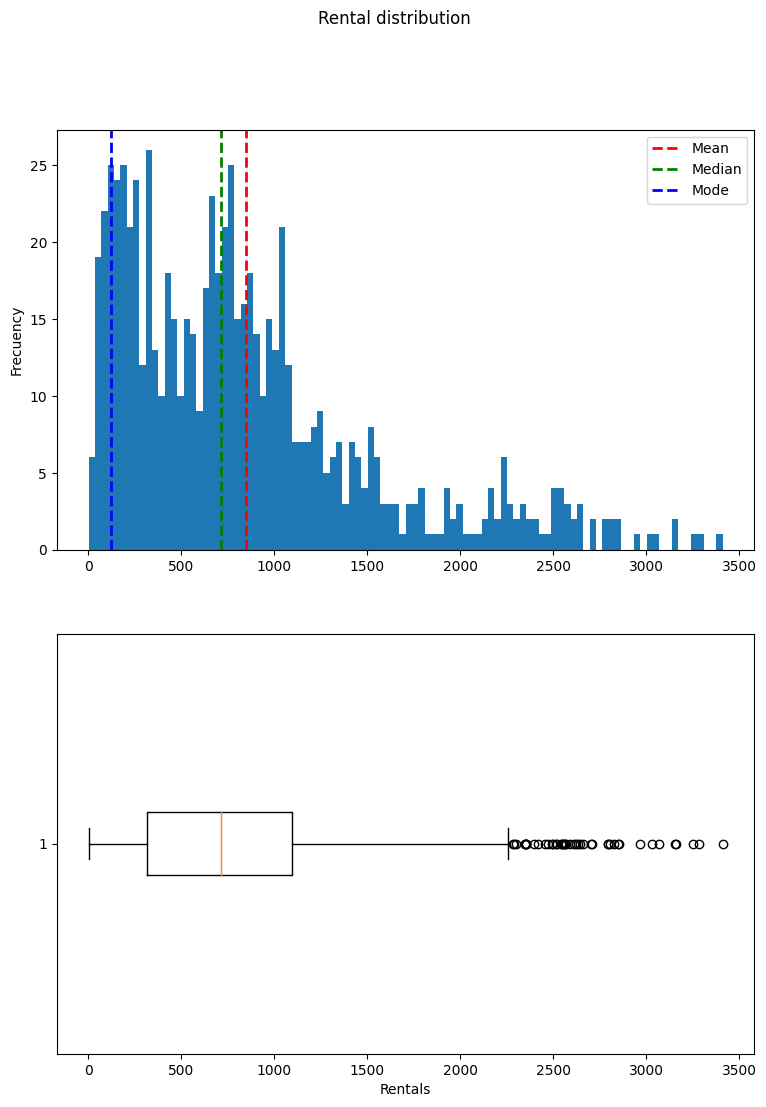

In [7]:
import matplotlib.pyplot as plt

# Ensure plots are displayed inline
%matplotlib inline

label = bike_data['rentals']

fig, ax = plt.subplots(2, 1, figsize=(9, 12))

ax[0].hist(label, bins=100)
ax[0].set_ylabel('Frecuency')

# Vlines for mean, median and mode
ax[0].axvline(label.mean(), color='r', linestyle='dashed', linewidth=2, label='Mean')
ax[0].axvline(label.median(), color='g', linestyle='dashed', linewidth=2, label='Median')
ax[0].axvline(label.mode()[0], color='b', linestyle='dashed', linewidth=2, label='Mode')
ax[0].legend()

# Boxplot
ax[1].boxplot(label, vert=False)
ax[1].set_xlabel('Rentals')

fig.suptitle('Rental distribution')
fig.show()

The plots show that the number of daily rentals ranges from 0 to just over 3,400. However, the mean (and median) number of daily rentals is closer to the low end of that range, with most of the data between 0 and around 2,200 rentals. The few values above this are shown in the box plot as small circles, indicating that they are outliers - in other words, unusually high or low values beyond the typical range of most of the data.

We can do the same kind of visual exploration of the numeric features. Let's create a histogram for each of these.

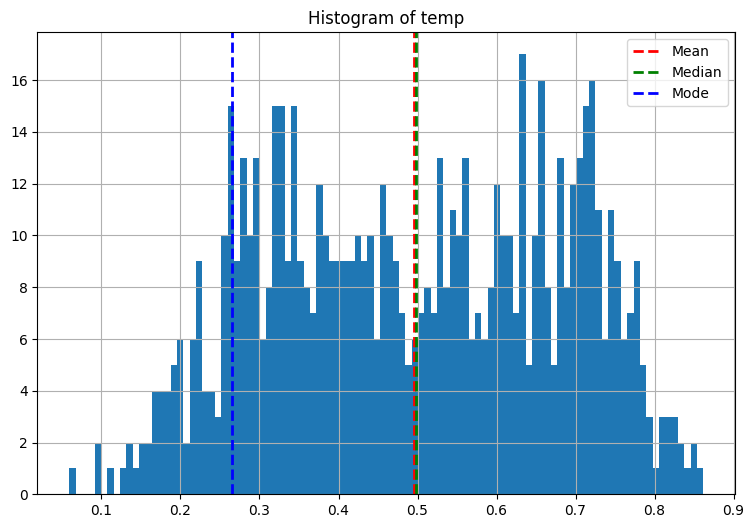

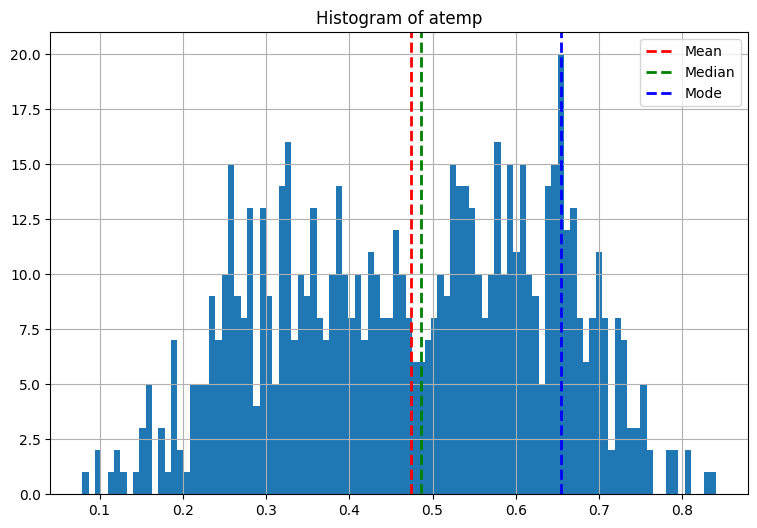

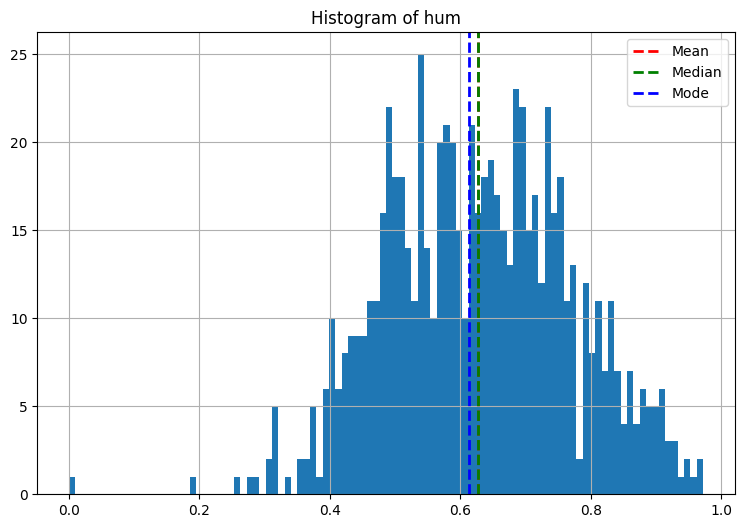

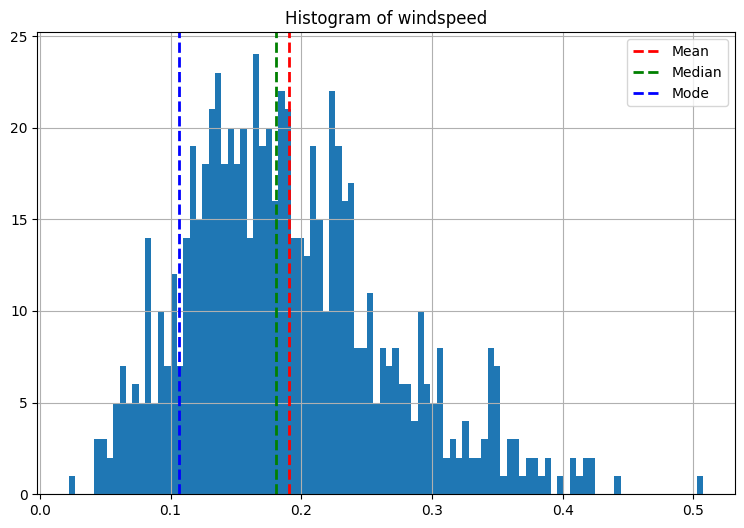

In [8]:
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = bike_data[col]
    feature.hist(bins=100, ax=ax)
    ax.axvline(feature.mean(), color='r', linestyle='dashed', linewidth=2, label='Mean')
    ax.axvline(feature.median(), color='g', linestyle='dashed', linewidth=2, label='Median')
    ax.axvline(feature.mode()[0], color='b', linestyle='dashed', linewidth=2, label='Mode')
    ax.legend()
    ax.set_title('Histogram of {}'.format(col))

plt.show()


The numeric features seem to be more normally distributed, with the mean and median nearer the middle of the range of values, coinciding with where the most commonly occurring values are.

These aren't continuous numbers on a scale, so we can't use histograms; but we can plot a bar chart showing the count of each discrete value for each category not numerical.

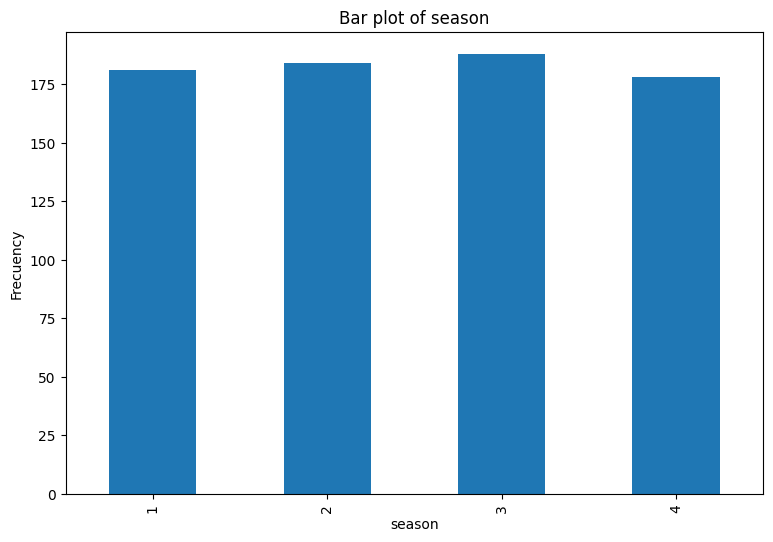

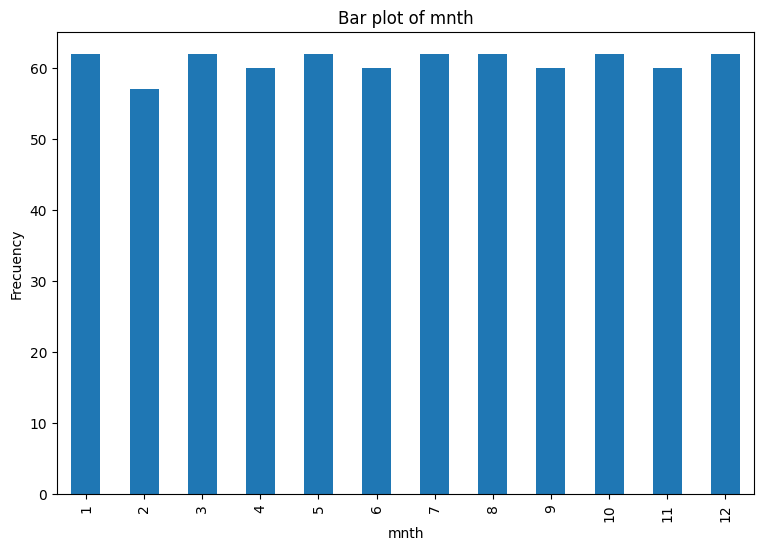

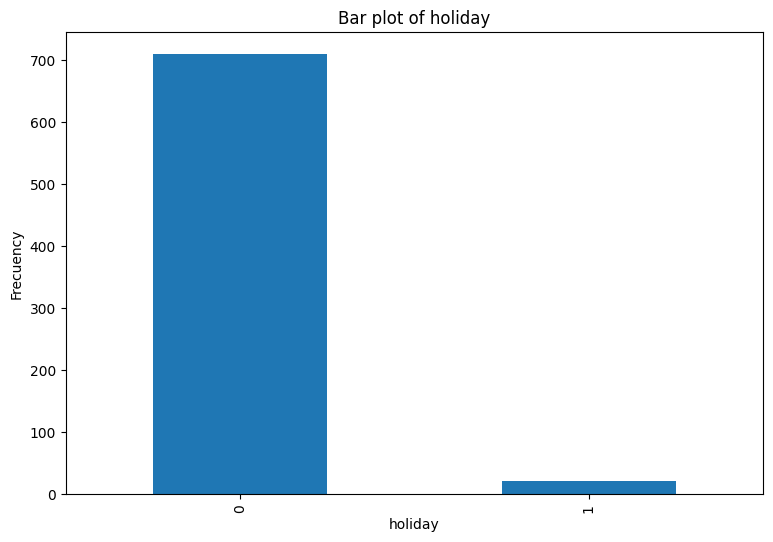

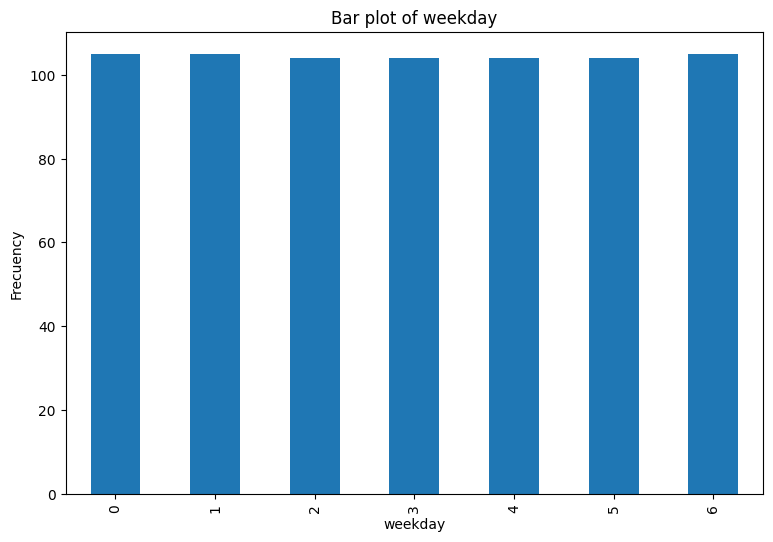

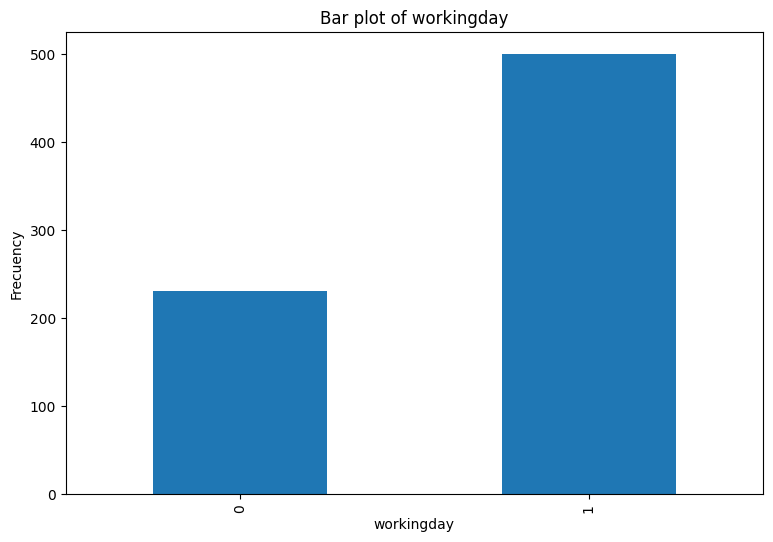

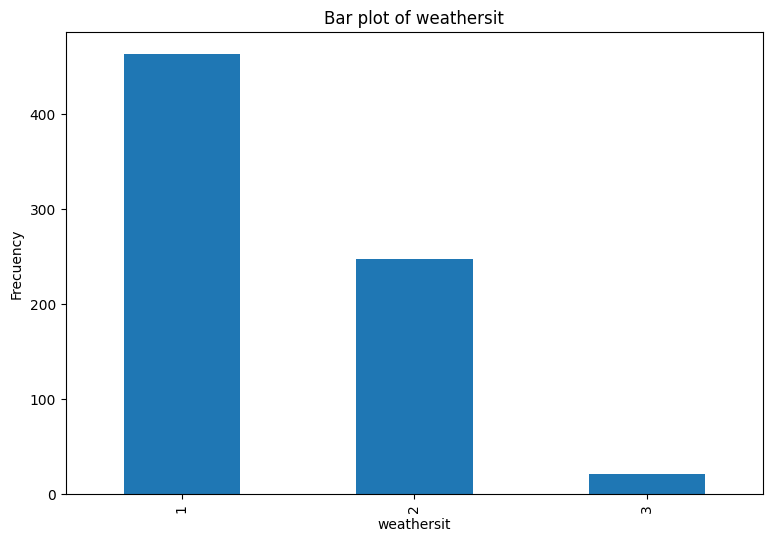

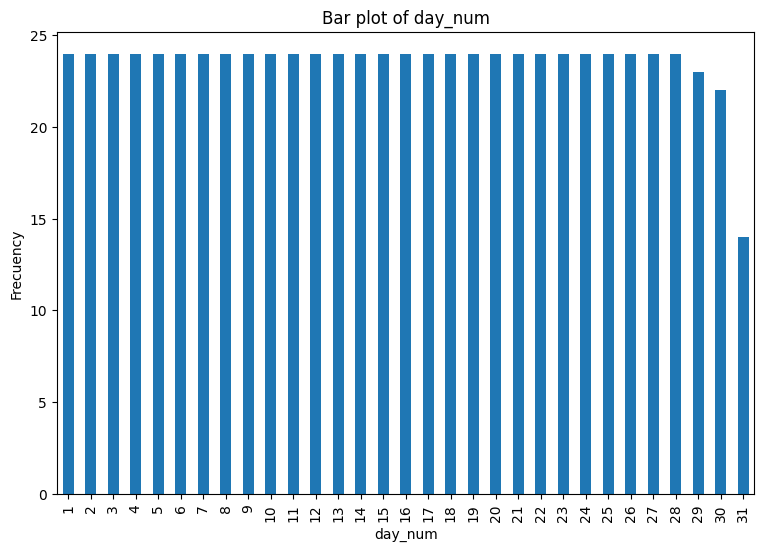

In [11]:
import numpy as np

categorical_features = ['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'day_num']

for col in categorical_features:
    counts = bike_data[col].value_counts().sort_index()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax=ax)
    ax.set_title('Bar plot of {}'.format(col))
    ax.set_xlabel(col)
    ax.set_ylabel('Frecuency')

plt.show()

Many of the categorical features show a more or less uniform distribution (meaning there's roughly the same number of rows for each category). Exceptions to this include:

- holiday: There are many fewer days that are holidays than days that aren't.

- workingday: There are more working days than non-working days.

- weathersit: Most days are category 1 (clear), with category 2 (mist and cloud) the next most common. There are comparatively few category 3 (light rain or snow) days, and no category 4 (heavy rain, hail, or fog) days at all.

Now that we know something about the distribution of the data in our columns, we can start to look for relationships between the features and the rentals label we want to be able to predict.

For the numeric features, we can create scatter plots that show the intersection of feature and label values. We can also calculate the correlation statistic to quantify the apparent relationship..

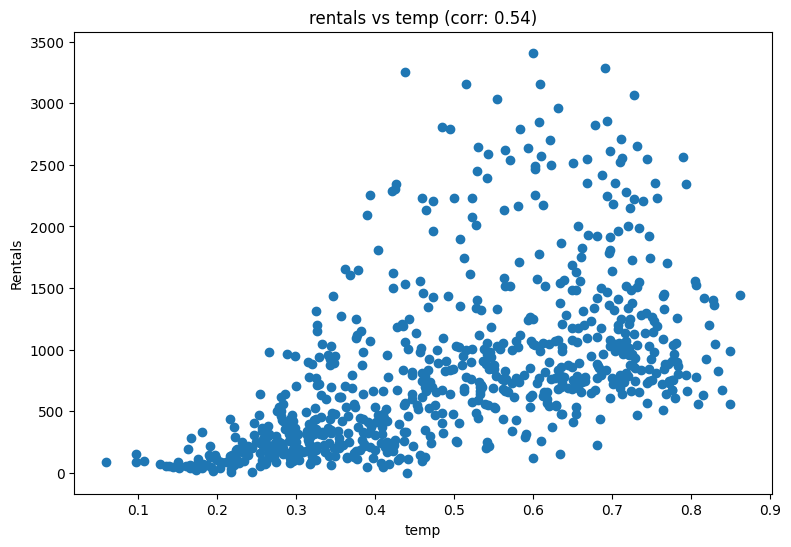

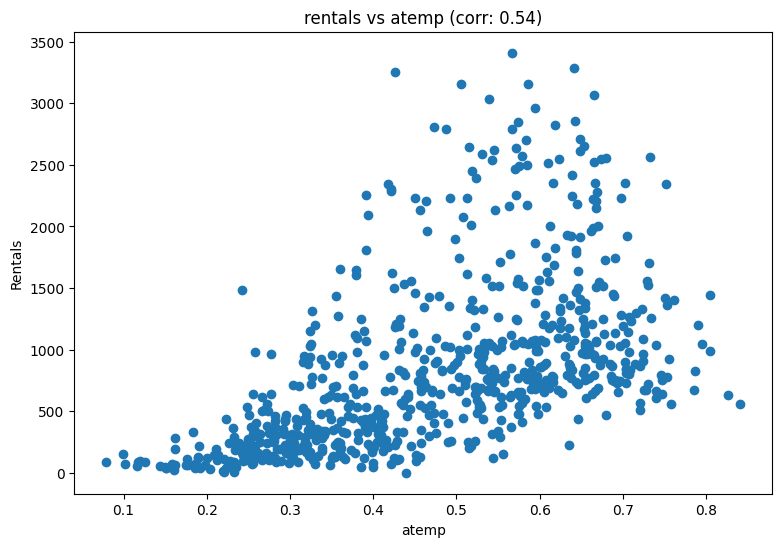

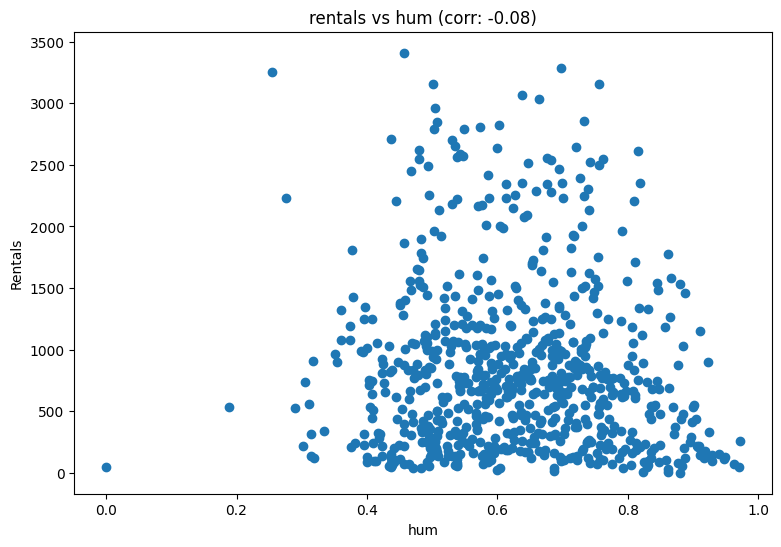

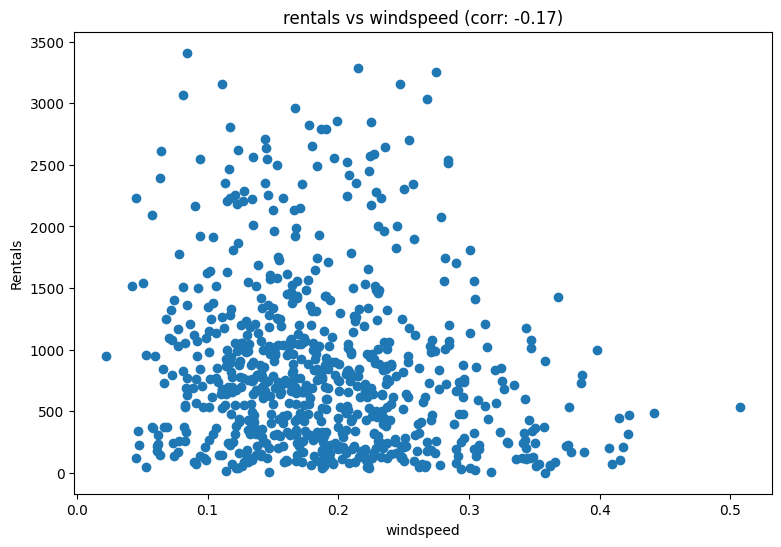

In [14]:
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = bike_data[col]
    label = bike_data['rentals']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Rentals')
    ax.set_title('rentals vs {} (corr: {:.2f})'.format(col, correlation))

plt.show()

The results aren't conclusive, but if you look closely at the scatter plots for temp and atemp, you can see a vague diagonal trend showing that higher rental counts tend to coincide with higher temperatures; and a correlation value of just over 0.5 for both of these features supports this observation. Conversely, the plots for hum and windspeed show a slightly negative correlation, indicating that there are fewer rentals on days with high humidity or windspeed.

Now let's compare the categorical features to the label. We'll do this by creating box plots that show the distribution of rental counts for each category.

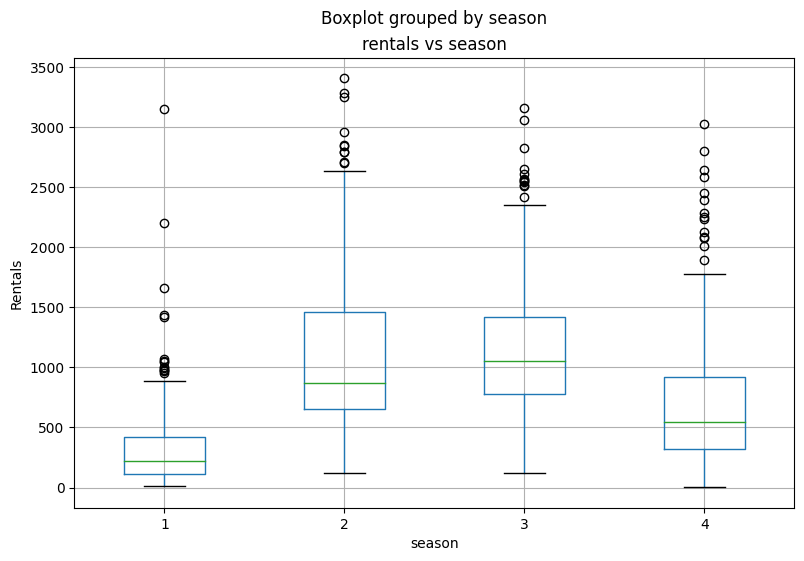

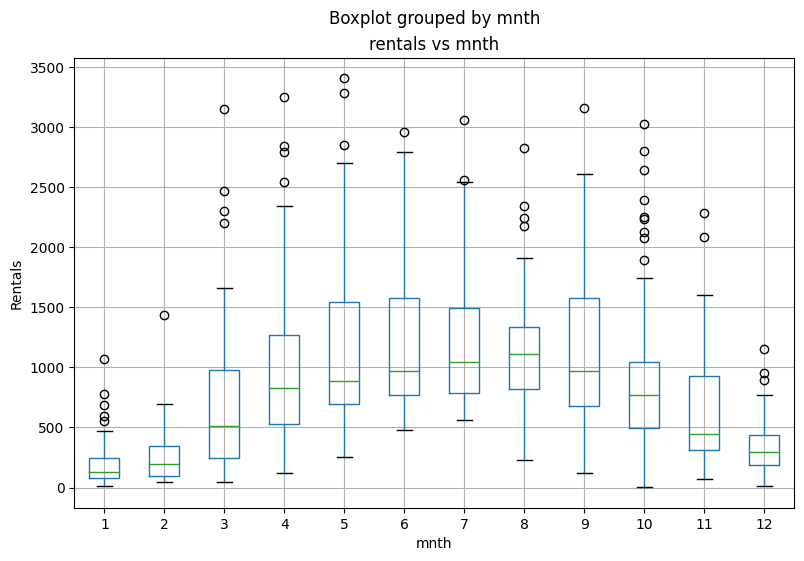

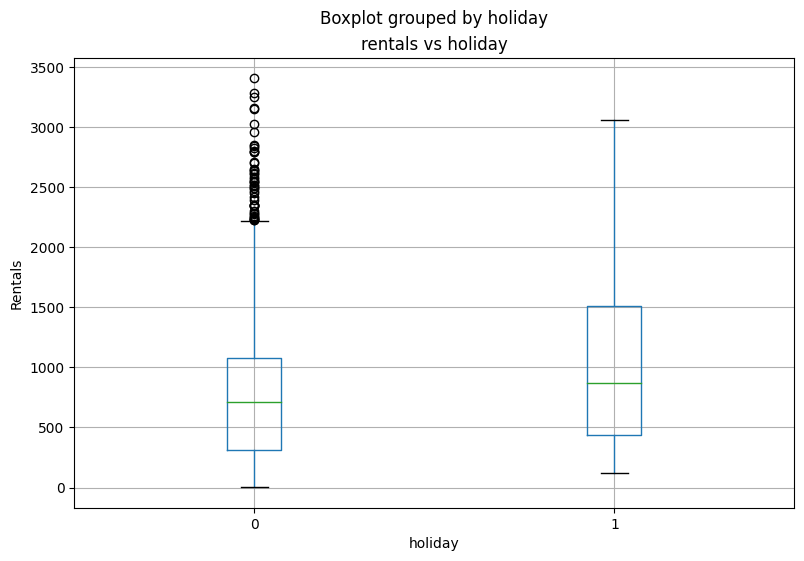

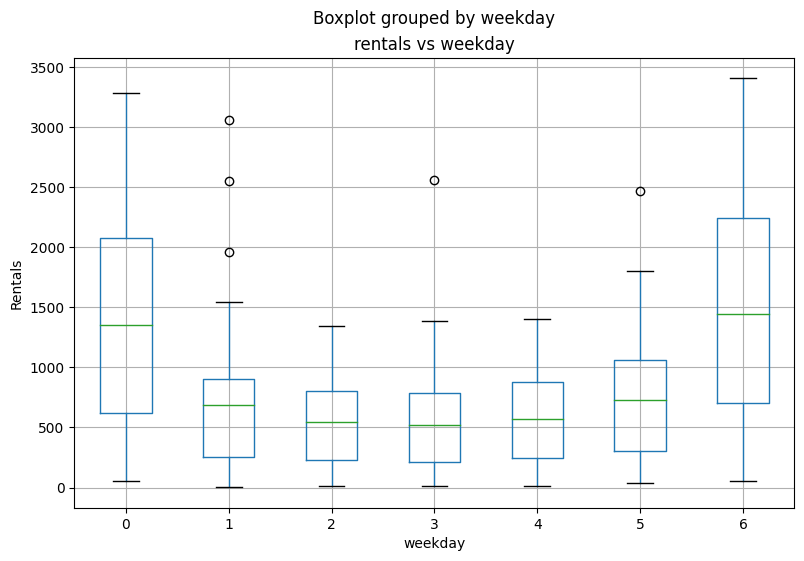

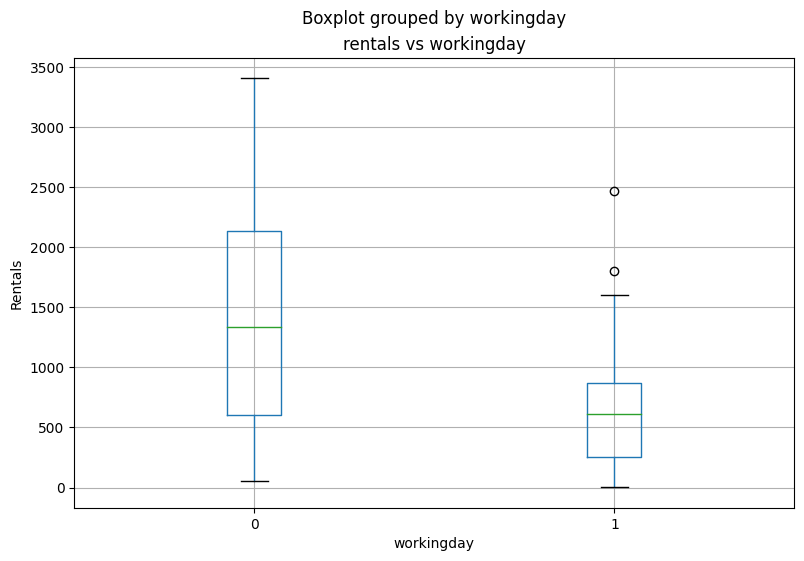

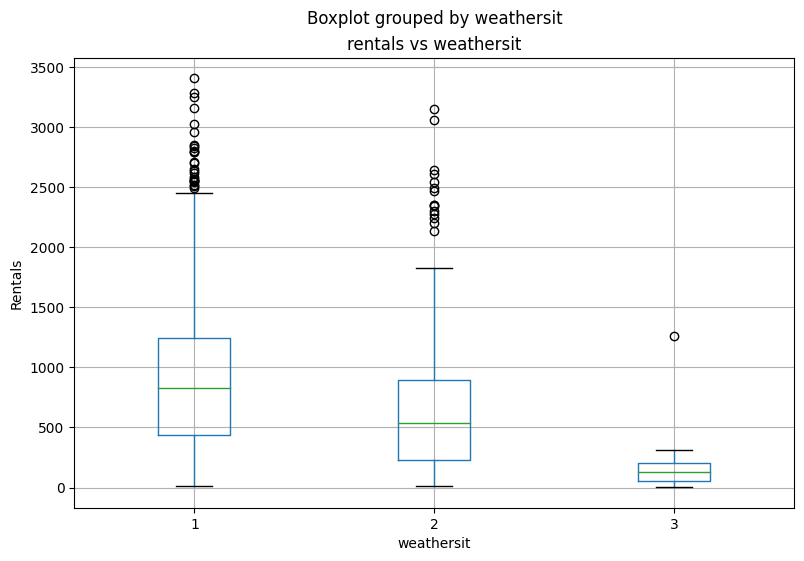

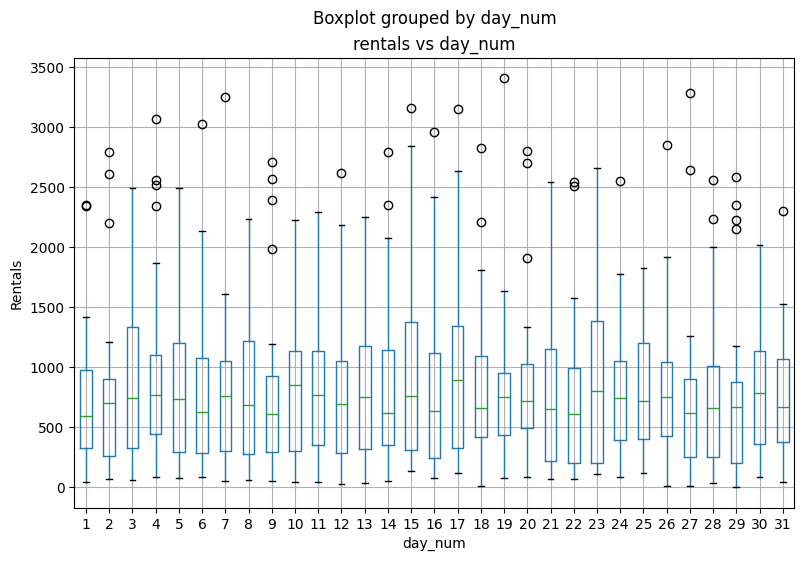

In [16]:
# Boxplot for each categorical feature
for col in categorical_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    bike_data.boxplot(column='rentals', by=col, ax=ax)
    ax.set_title('rentals vs {}'.format(col))
    ax.set_xlabel(col)
    ax.set_ylabel('Rentals')

plt.show()

The plots show some variance in the relationship between some category values and rentals. 

For example, there's a clear difference in the distribution of rentals on weekends (weekday 0 or 6) and those during the working week (weekday 1 to 5). 

Similarly, there are notable differences for holiday and workingday categories. 

There's a noticeable trend that shows different rental distributions in spring and summer months compared to winter and fall months. 

The weathersit category also seems to make a difference in rental distribution. 

The day feature we created for the day of the month shows little variation, indicating that it's probably not predictive of the number of rentals.



## The model

### Train a model

In [19]:
x, y = bike_data[['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'day_num', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed']].values, bike_data['rentals'].values
print('Features:', x[:10], '\nLabels:', y[:10], sep='\n')

Features:
[[ 1.         1.         0.         6.         0.         2.
   1.         2.         0.344167   0.363625   0.805833   0.160446 ]
 [ 1.         1.         0.         0.         0.         2.
   2.         2.         0.363478   0.353739   0.696087   0.248539 ]
 [ 1.         1.         0.         1.         1.         1.
   3.         1.         0.196364   0.189405   0.437273   0.248309 ]
 [ 1.         1.         0.         2.         1.         1.
   4.         1.         0.2        0.212122   0.590435   0.160296 ]
 [ 1.         1.         0.         3.         1.         1.
   5.         1.         0.226957   0.22927    0.436957   0.1869   ]
 [ 1.         1.         0.         4.         1.         1.
   6.         1.         0.204348   0.233209   0.518261   0.0895652]
 [ 1.         1.         0.         5.         1.         2.
   7.         2.         0.196522   0.208839   0.498696   0.168726 ]
 [ 1.         1.         0.         6.         0.         2.
   8.         2.   

After separating the dataset, we now have numpy arrays named X containing the features, and y containing the labels.

We could train a model using all of the data; but it's common practice in supervised learning to split the data into two subsets; a (typically larger) set with which to train the model, and a smaller "hold-back" set with which to validate the trained model. 

In [21]:
from sklearn.model_selection import train_test_split

# Split 70-30
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

Now we have the following four datasets:

- X_train: The feature values we'll use to train the model

- y_train: The corresponding labels we'll use to train the model

- X_test: The feature values we'll use to validate the model

- y_test: The corresponding labels we'll use to validate the model

Now we're ready to train a model by fitting a suitable regression algorithm to the training data. We'll use a linear regression algorithm, a common starting point for regression that works by trying to find a linear relationship between the X values and the y label. The resulting model is a function that conceptually defines a line where every possible X and y value combination intersect.

In Scikit-Learn, training algorithms are encapsulated in estimators, and in this case we'll use the LinearRegression estimator to train a linear regression model.

In [22]:
# Train the model
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(x_train, y_train)
print(model)

LinearRegression()


### Evaluate the model

In [23]:
predictions = model.predict(x_test)
np.set_printoptions(suppress=True)
print('Predicted labels: ', np.round(predictions)[:10], sep='\n')
print('Actual labels: ', y_test[:10], sep='\n')

Predicted labels: 
[1895. 1205. 1001.    3.  290.  383.  451.  620. 1488.  -49.]
Actual labels: 
[2418  754  222   47  244  145  240  555 3252   38]


Comparing each prediction with its corresponding "ground truth" actual value isn't a very efficient way to determine how well the model is predicting. Let's see if we can get a better indication by visualizing a scatter plot that compares the predictions to the actual labels. We'll also overlay a trend line to get a general sense for how well the predicted labels align with the true labels.

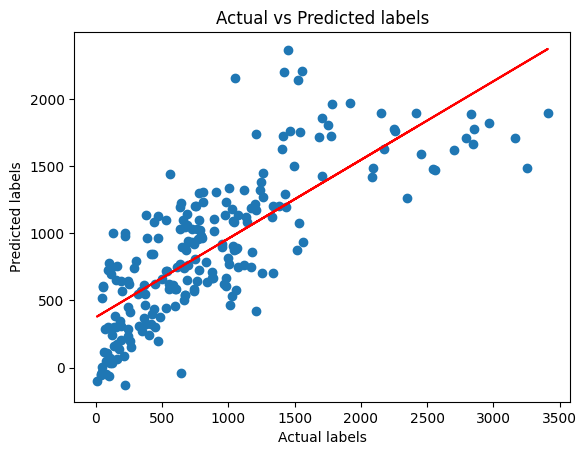

In [24]:
plt.scatter(y_test, predictions)
plt.xlabel('Actual labels')
plt.ylabel('Predicted labels')
plt.title('Actual vs Predicted labels')

# Overlay regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color='r')
plt.show()

There's a definite diagonal trend, and the intersections of the predicted and actual values are generally following the path of the trend line; but there's a fair amount of difference between the ideal function represented by the line and the results. 

This variance represents the residuals of the model - in other words, the difference between the label predicted when the model applies the coefficients it learned during training to the validation data, and the actual value of the validation label. 

These residuals when evaluated from the validation data indicate the expected level of error when the model is used with new data for which the label is unknown.

You can quantify the residuals by calculating a number of commonly used evaluation metrics. We'll focus on the following three:

- Mean Square Error (MSE): The mean of the squared differences between predicted and actual values. This yields a relative metric in which the smaller the value, the better the fit of the model

- Root Mean Square Error (RMSE): The square root of the MSE. This yields an absolute metric in the same unit as the label (in this case, numbers of rentals). The smaller the value, the better the model (in a simplistic sense, it represents the average number of rentals by which the predictions are wrong!)

- Coefficient of Determination (usually known as R-squared or R2): A relative metric in which the higher the value, the better the fit of the model. In essence, this metric represents how much of the variance between predicted and actual label values the model is able to explain.

Let's use Scikit-Learn to calculate these metrics for our model, based on the predictions it generated for the validation data.

In [26]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
print('Mean squared error: {:.2f}'.format(mse))

rmse = np.sqrt(mse)
print('Root mean squared error: {:.2f}'.format(rmse))

r2 = r2_score(y_test, predictions)
print('R2 score: {:.2f}'.format(r2))

Mean squared error: 202873.56
Root mean squared error: 450.41
R2 score: 0.60
